<a href="https://colab.research.google.com/github/nonoumasy/Pasadena-Traffic-Collisions-2008-2017/blob/master/Pasadena_Traffic_Collisions_2008_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

In [110]:
# load data
df = pd.read_csv('/content/Traffic_Collisions.csv')

# clean column names
df.columns = df.columns.str.lower()

# keep these columns
new_df = df[['date', 'time', 'injury', 'noinjured', 'nokilled', 'cause', 'collisntyp', 'invwith', 'weather', 'lighting', 'controls', \
             'hitandrun', 'partytype1', 'partyage1', 'partysex1', 'movement1']]

# dropping bad value for 'partyage1' = 248
new_df = new_df[new_df.partyage1 != 110]

# missing values
new_df.partyage1 = new_df.partyage1.fillna(method='ffill')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,37,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [111]:
df.head(2)

,objectid,accidno,date,time,day,street,crossst,distance,direction,x,y,injury,noinjured,nokilled,ptyatfault,cause,hitandrun,collisntyp,invwith,pedaction,pvtprop,violation,weather,roadsurf,roadcond,lighting,controls,partytype1,partyage1,partysex1,direction1,movement1,specinfo1,sobriety1,vehtype1,vehyear1,vehmake1,vehmodel1,speedlim1,damage1,safetyeq1,partytype2,partyage2,partysex2,direction2,movement2,specinfo2,sobriety2,vehtype2,vehyear2,vehmake2,vehmodel2,speedlim2,damage2,safetyeq2
0,1001,10375143901001,5/28/2008,2:39:00 PM,Wednesday,EL MOLINO AVE,CORNELL RD,100,North,6.520278e+06,1.870827e+06,Property Damage Only,0,0.0,1.0,Improper Turning,No,Hit Object,Fixed Object,No Pedestrian Involved,False,22107,Clear,NaN,NaN,Daylight,No Controls Present / Factor,Driver,80.0,Male,South,Proceeding Straight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lap/Shoulder Harness Used,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,10375152505970,5/28/2008,3:25:00 PM,Wednesday,MICHIGAN AVE,WASHINGTON BLVD,0,Not Stated,6.523659e+06,1.883920e+06,Property Damage Only,0,0.0,1.0,Auto R/W Violation,No,Sideswipe,Other Motor Vehicle,No Pedestrian Involved,False,21802,Clear,NaN,NaN,Daylight,Functioning,Driver,19.0,Female,North,Entering Traffic,NaN,NaN,Passenger Car,NaN,NaN,NaN,NaN,NaN,Lap/Shoulder Harness Used,Driver,19.0,Female,East,Proceeding Straight,NaN,NaN,Passenger Car,NaN,NaN,NaN,NaN,NaN,Lap/Shoulder Harness Used


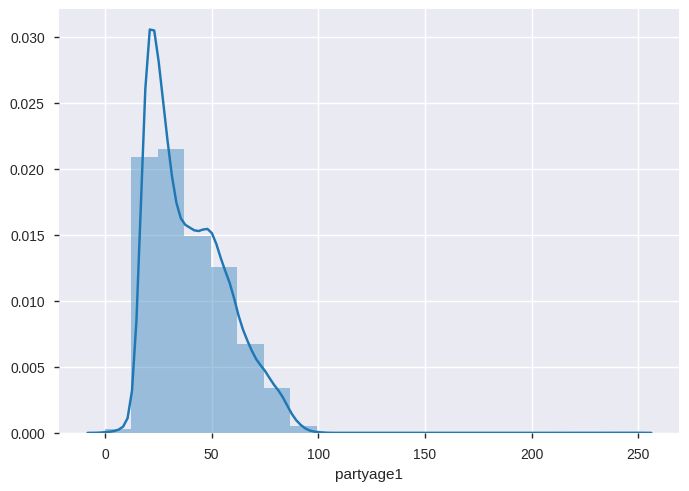

In [92]:
sns.distplot(new_df.partyage1, bins=20)

In [93]:
new_df.head()

,date,time,injury,noinjured,nokilled,cause,collisntyp,invwith,weather,lighting,controls,partytype1,partyage1,partysex1,movement1
0,5/28/2008,2:39:00 PM,Property Damage Only,0,0.0,Improper Turning,Hit Object,Fixed Object,Clear,Daylight,No Controls Present / Factor,Driver,80.0,Male,Proceeding Straight
1,5/28/2008,3:25:00 PM,Property Damage Only,0,0.0,Auto R/W Violation,Sideswipe,Other Motor Vehicle,Clear,Daylight,Functioning,Driver,19.0,Female,Entering Traffic
2,5/28/2008,4:12:00 PM,Complaint of Pain,1,0.0,Pedestrian Violation,Broadside,Pedestrian,Clear,Daylight,No Controls Present / Factor,Pedestrian,20.0,Male,Not Applicable - Ped
3,5/28/2008,5:00:00 PM,Property Damage Only,0,0.0,Auto R/W Violation,Broadside,Other Motor Vehicle,Clear,Daylight,No Controls Present / Factor,Driver,21.0,Female,Making Left Turn
4,5/29/2008,7:55:00 AM,Property Damage Only,0,0.0,Traffic Signals and Signs,Broadside,Other Motor Vehicle,Clear,Daylight,Functioning,Driver,23.0,Male,Proceeding Straight


In [94]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17031 entries, 0 to 17030
Data columns (total 15 columns):
date          17031 non-null object
time          17011 non-null object
injury        17025 non-null object
noinjured     17031 non-null int64
nokilled      17025 non-null float64
cause         16987 non-null object
collisntyp    17031 non-null object
invwith       17031 non-null object
weather       17030 non-null object
lighting      17031 non-null object
controls      17020 non-null object
partytype1    17029 non-null object
partyage1     17031 non-null float64
partysex1     15769 non-null object
movement1     16951 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 2.1+ MB


In [89]:
ProfileReport(new_df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,17031
Total Missing (%),2.2%
Total size in memory,1.9 MiB
Average record size in memory,120.0 B
Numeric,3
Categorical,12
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [41]:
new_df.describe()

,noinjured,nokilled,partyage1
count,17031.000000,17025.000000,12838.000000
mean,0.514474,0.002996,39.384406
std,0.818897,0.060759,17.993979
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,24.000000
50%,0.000000,0.000000,36.000000
75%,1.000000,0.000000,52.000000
max,9.000000,2.000000,248.000000


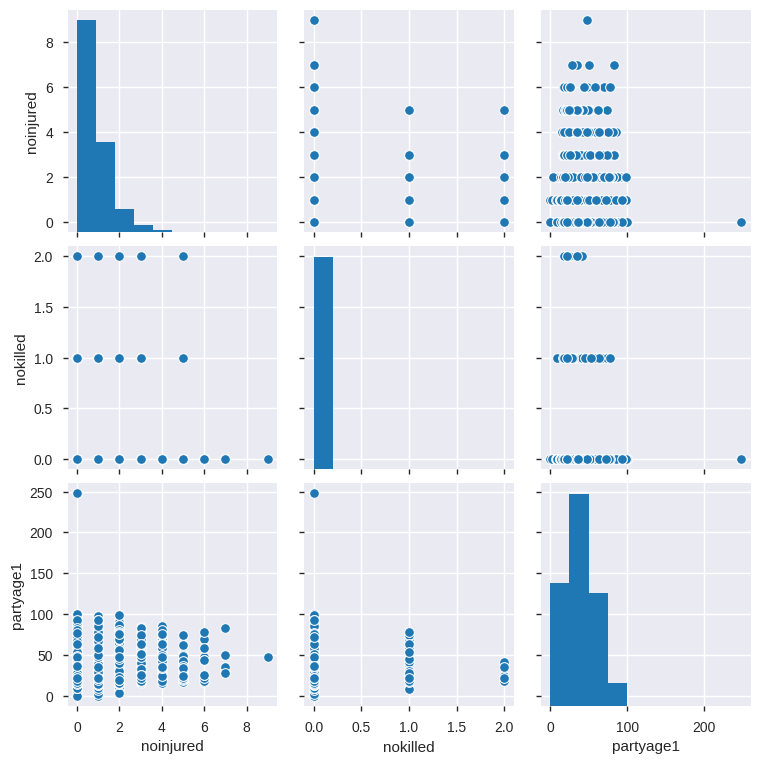

In [95]:
sns.pairplot(new_df)

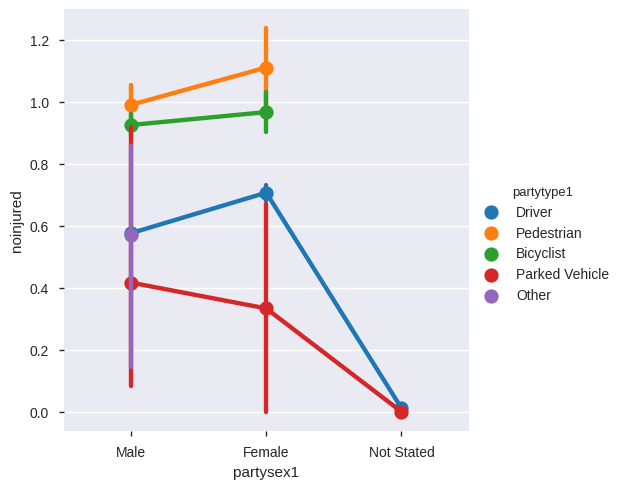

In [106]:
sns.catplot(data = new_df, x='partysex1',
            y='noinjured', 
            kind='point', 
            hue='partytype1',
            )

In [45]:
new_df[new_df.noinjured >= 5]

,date,time,injury,noinjured,nokilled,cause,collisntyp,invwith,weather,lighting,controls,partytype1,partyage1,partysex1,movement1
674,9/27/2008,11:30:00 AM,Complaint of Pain,5,0.0,Traffic Signals and Signs,Broadside,Other Motor Vehicle,Clear,Daylight,Functioning,Driver,74.0,Female,Proceeding Straight
1451,4/27/2011,12:18:00 PM,Other Visible Injury,6,0.0,Improper Turning,Sideswipe,Other Motor Vehicle,Clear,Daylight,Functioning,Driver,70.0,Female,Making U Turn
1706,6/18/2011,4:30:00 PM,Other Visible Injury,5,0.0,Auto R/W Violation,Broadside,Other Motor Vehicle,Clear,Daylight,No Controls Present / Factor,Driver,51.0,Male,Making Left Turn
1784,7/7/2011,10:00:00 AM,Complaint of Pain,6,0.0,Unsafe Speed,Rear-End,Other Motor Vehicle,Clear,Daylight,Functioning,Driver,18.0,Female,Stopped In Road
1889,8/3/2011,8:52:00 AM,Complaint of Pain,9,0.0,Unsafe Speed,Rear-End,Other Motor Vehicle,Clear,Daylight,Functioning,Driver,47.0,Female,Proceeding Straight
2425,11/12/2013,3:08:00 PM,Complaint of Pain,5,0.0,Auto R/W Violation,Broadside,Other Motor Vehicle,Cloudy,Daylight,No Controls Present / Factor,Driver,50.0,Male,Making Left Turn
2738,1/18/2014,7:35:00 PM,Severe Injury,5,0.0,Traffic Signals and Signs,Broadside,Other Motor Vehicle,Clear,Dark - Street Lights,Functioning,Driver,30.0,Female,Proceeding Straight
2857,2/15/2014,12:35:00 PM,Complaint of Pain,5,0.0,Auto R/W Violation,Broadside,Other Motor Vehicle,Clear,Daylight,Functioning,Driver,34.0,Female,Making Left Turn
3265,1/22/2010,7:27:00 PM,Complaint of Pain,6,0.0,Improper Turning,Sideswipe,Other Motor Vehicle,Raining,Dark - Street Lights,Not Stated,Driver,17.0,Female,Making U Turn
3305,2/4/2010,10:39:00 AM,Other Visible Injury,5,0.0,Traffic Signals and Signs,Broadside,Other Motor Vehicle,Clear,Daylight,Functioning,Driver,40.0,Female,Proceeding Straight


In [42]:
new_df.noinjured.value_counts()

0    10739
1     4581
2     1194
3      350
4      118
5       31
6       12
7        5
9        1
Name: noinjured, dtype: int64

In [17]:
df.cause.value_counts(normalize=True)

Unsafe Speed                  0.179196
Unknown                       0.169012
Auto R/W Violation            0.165067
Improper Turning              0.128687
Traffic Signals and Signs     0.128216
Unsafe Starting or Backing    0.042209
Driving Under Influence       0.033261
Unsafe Lane Change            0.029905
Following Too Closely         0.024195
Pedestrian Violation          0.023194
Ped R/W Violation             0.018838
Wrong Side of Road            0.016542
Other Hazardous Movement      0.015718
Improper Passing              0.008065
Other Than Driver             0.007476
Other Improper Driving        0.003826
Not Stated                    0.002885
Other                         0.002767
Hazardous Parking             0.000353
Impeding Traffic              0.000235
Brakes                        0.000118
Fell Asleep                   0.000059
Lights                        0.000059
Other Than Driver or Ped      0.000059
Other Equipment               0.000059
Name: cause, dtype: float

In [44]:
new_df[new_df.noinjured >= 1]['cause'].value_counts(normalize=True)

Auto R/W Violation            0.238604
Unsafe Speed                  0.198916
Traffic Signals and Signs     0.194613
Improper Turning              0.099139
Pedestrian Violation          0.052279
Ped R/W Violation             0.047657
Driving Under Influence       0.029806
Wrong Side of Road            0.026140
Following Too Closely         0.022952
Unsafe Starting or Backing    0.018170
Other Hazardous Movement      0.017851
Unsafe Lane Change            0.015461
Unknown                       0.013389
Other Than Driver             0.007491
Improper Passing              0.006057
Other                         0.003985
Other Improper Driving        0.003507
Not Stated                    0.003028
Impeding Traffic              0.000478
Other Than Driver or Ped      0.000159
Lights                        0.000159
Brakes                        0.000159
Name: cause, dtype: float64

In [31]:
new_df.head()

,date,time,injury,noinjured,nokilled,cause,collisntyp,invwith,weather,lighting,controls,partytype1,partyage1,partysex1,movement1
0,5/28/2008,2:39:00 PM,Property Damage Only,0,0.0,Improper Turning,Hit Object,Fixed Object,Clear,Daylight,No Controls Present / Factor,Driver,80.0,Male,Proceeding Straight
1,5/28/2008,3:25:00 PM,Property Damage Only,0,0.0,Auto R/W Violation,Sideswipe,Other Motor Vehicle,Clear,Daylight,Functioning,Driver,19.0,Female,Entering Traffic
2,5/28/2008,4:12:00 PM,Complaint of Pain,1,0.0,Pedestrian Violation,Broadside,Pedestrian,Clear,Daylight,No Controls Present / Factor,Pedestrian,20.0,Male,Not Applicable - Ped
3,5/28/2008,5:00:00 PM,Property Damage Only,0,0.0,Auto R/W Violation,Broadside,Other Motor Vehicle,Clear,Daylight,No Controls Present / Factor,Driver,21.0,Female,Making Left Turn
4,5/29/2008,7:55:00 AM,Property Damage Only,0,0.0,Traffic Signals and Signs,Broadside,Other Motor Vehicle,Clear,Daylight,Functioning,Driver,23.0,Male,Proceeding Straight


In [32]:
new_df.collisntyp.value_counts(normalize=True)

Broadside               0.389760
Rear-End                0.234161
Sideswipe               0.184252
Head-On                 0.061300
Hit Object              0.056250
Vehicle - Pedestrian    0.034056
Not Stated              0.022547
Other                   0.013446
Overturned              0.004228
Name: collisntyp, dtype: float64

In [36]:
new_df[new_df.noinjured >= 1]['collisntyp'].value_counts(normalize=True)

Broadside               0.467419
Rear-End                0.200890
Vehicle - Pedestrian    0.084393
Sideswipe               0.084075
Head-On                 0.073903
Hit Object              0.036713
Not Stated              0.028290
Other                   0.017324
Overturned              0.006993
Name: collisntyp, dtype: float64

In [40]:
new_df[new_df.noinjured >= 1]['movement1'].value_counts(normalize=True)

Proceeding Straight                       0.544684
Making Left Turn                          0.235651
Making Right Turn                         0.054676
Entering Traffic                          0.045723
Changing Lanes                            0.020144
Making U Turn                             0.015667
Backing                                   0.011031
Slowing/Stopping                          0.010871
Other                                     0.010072
Other Unsafe Turning                      0.009752
Stopped In Road                           0.008633
Parked                                    0.006395
Ran Off Road                              0.005596
Traveling Wrong Way                       0.005116
Passing Other Vehicle                     0.005116
Not Stated                                0.002718
Not Applicable - Ped                      0.002398
Crossed Into Opposing Lane - Unplanned    0.002398
Parking Maneuver                          0.002238
Merging                        

In [37]:
new_df[new_df.noinjured >= 1]['injury'].value_counts(normalize=True)#.plot(kind='pie', figsize=(16,9))

Complaint of Pain       0.646675
Other Visible Injury    0.314668
Severe Injury           0.027521
Property Damage Only    0.008431
Fatal                   0.002704
Name: injury, dtype: float64

In [38]:
new_df[(new_df.noinjured >= 1) & (new_df.collisntyp == 'Broadside')]['cause'].value_counts(normalize=True)

Auto R/W Violation            0.391008
Traffic Signals and Signs     0.365123
Improper Turning              0.084128
Pedestrian Violation          0.045981
Wrong Side of Road            0.032016
Other Hazardous Movement      0.015668
Unsafe Speed                  0.014305
Driving Under Influence       0.011921
Ped R/W Violation             0.009537
Unknown                       0.008856
Unsafe Starting or Backing    0.006812
Improper Passing              0.003747
Other                         0.003747
Unsafe Lane Change            0.003406
Following Too Closely         0.001022
Not Stated                    0.000681
Other Than Driver             0.000681
Other Improper Driving        0.000681
Brakes                        0.000341
Lights                        0.000341
Name: cause, dtype: float64

In [39]:
new_df[new_df.noinjured >= 1]['cause'].value_counts(normalize=True)

Auto R/W Violation            0.238604
Unsafe Speed                  0.198916
Traffic Signals and Signs     0.194613
Improper Turning              0.099139
Pedestrian Violation          0.052279
Ped R/W Violation             0.047657
Driving Under Influence       0.029806
Wrong Side of Road            0.026140
Following Too Closely         0.022952
Unsafe Starting or Backing    0.018170
Other Hazardous Movement      0.017851
Unsafe Lane Change            0.015461
Unknown                       0.013389
Other Than Driver             0.007491
Improper Passing              0.006057
Other                         0.003985
Other Improper Driving        0.003507
Not Stated                    0.003028
Impeding Traffic              0.000478
Other Than Driver or Ped      0.000159
Lights                        0.000159
Brakes                        0.000159
Name: cause, dtype: float64

In [48]:
new_df[new_df.noinjured >= 0]['lighting'].value_counts(normalize=True)

Daylight                                0.620574
Dark - Street Lights                    0.194058
Not Stated                              0.152017
Dusk - Dawn                             0.027773
Dark - No Street Lights                 0.004932
Dark - Street Lights Not Functioning    0.000646
Name: lighting, dtype: float64

In [51]:
new_df[new_df.noinjured >= 1]['lighting'].value_counts(normalize=True)

Daylight                                0.753814
Dark - Street Lights                    0.204228
Dusk - Dawn                             0.034965
Dark - No Street Lights                 0.004450
Not Stated                              0.001748
Dark - Street Lights Not Functioning    0.000795
Name: lighting, dtype: float64

In [47]:
new_df['lighting'].value_counts(normalize=True)

Daylight                                0.620574
Dark - Street Lights                    0.194058
Not Stated                              0.152017
Dusk - Dawn                             0.027773
Dark - No Street Lights                 0.004932
Dark - Street Lights Not Functioning    0.000646
Name: lighting, dtype: float64

In [54]:
new_df['weather'].value_counts(normalize=True)

Clear         0.723840
Not Stated    0.151380
Cloudy        0.091309
Raining       0.032179
Other         0.000587
Fog           0.000352
Wind          0.000294
Snowing       0.000059
Name: weather, dtype: float64

In [56]:
new_df[new_df.noinjured >= 0]['invwith'].value_counts(normalize=True)

Other Motor Vehicle               0.737596
Parked Motor Vehicle              0.083906
Fixed Object                      0.075862
Pedestrian                        0.043274
Bicycle                           0.042100
Motor Vehicle on Other Roadway    0.004639
Other Object                      0.004462
Non-Collision                     0.004110
Not Stated                        0.002760
Other                             0.000528
Train                             0.000470
Animal                            0.000294
Name: invwith, dtype: float64

In [64]:
new_df.groupby('cause')['invwith'].value_counts(normalize=True)

cause                       invwith                       
Auto R/W Violation          Other Motor Vehicle               0.900499
                            Bicycle                           0.063124
                            Pedestrian                        0.012126
                            Fixed Object                      0.007846
                            Non-Collision                     0.006419
                            Motor Vehicle on Other Roadway    0.004993
                            Parked Motor Vehicle              0.002853
                            Not Stated                        0.001070
                            Other Object                      0.000713
                            Other                             0.000357
Brakes                      Bicycle                           1.000000
Driving Under Influence     Other Motor Vehicle               0.394690
                            Fixed Object                      0.300885
                  

In [0]:
pd.set_option('display.max_rows', 1000)

In [122]:
new_df[new_df.noinjured >= 1]['hitandrun'].value_counts(normalize=True)

No             0.942943
Felony         0.035601
Misdemeanor    0.021456
Name: hitandrun, dtype: float64

In [1]:
%%html

<div class='tableauPlaceholder' id='viz1585519631126' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2019LosAngelesCrimeMap&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='2019LosAngelesCrimeMap&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2019LosAngelesCrimeMap&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1585519631126');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>